In [2]:
# Load the data from the xlsx file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('Week2_Exercise1_data.xlsx')
data

,ZoneID,TourFreq,Income,Carown,PTlevel
0,1,1.812002,4.223198,1.057973,1
1,2,2.049621,10.953751,1.401639,0
2,3,1.718755,4.074798,1.474844,1
3,4,1.513000,4.344702,1.442983,2
4,5,1.462321,1.325070,1.397356,2
...,...,...,...,...,...
95,96,0.749436,1.000000,1.284426,1
96,97,1.096605,1.517873,1.124622,2
97,98,2.137727,7.589791,1.932477,2
98,99,1.551681,4.437850,1.500589,0


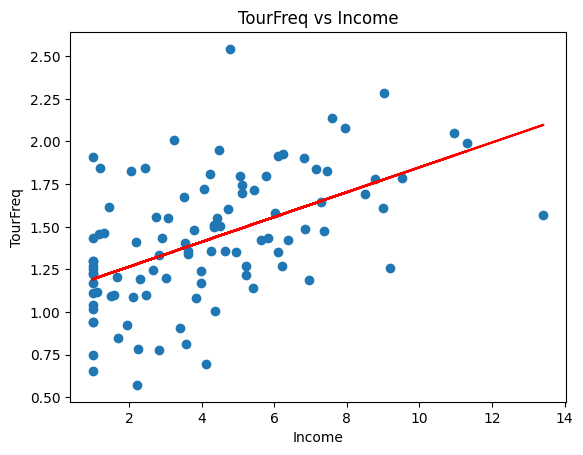

In [4]:
# We approximate with a linear model the reletionship between TourFreq and Income
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(data[['Income']], data['TourFreq'])
data['TourFreq_pred_1'] = model1.predict(data[['Income']])

# Plot the data and the linear model
plt.scatter(data['Income'], data['TourFreq'])
plt.plot(data['Income'], data['TourFreq_pred_1'], color='red')
plt.xlabel('Income')
plt.ylabel('TourFreq')
plt.title('TourFreq vs Income')
plt.show()

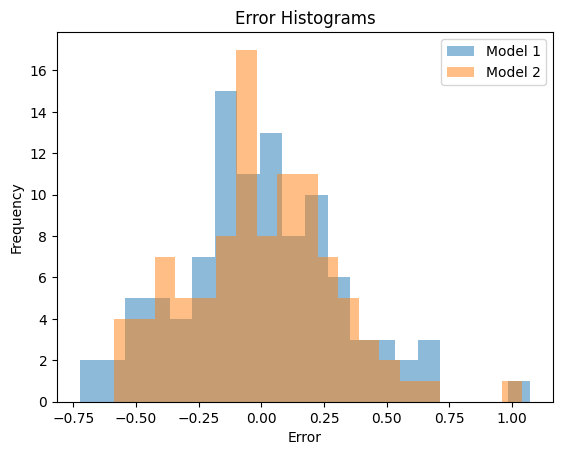

In [10]:
# Add binary variables checking if PTlevel is 1 and one if PTlevel is 2
data['PTlevel_1'] = (data['PTlevel'] == 1).astype(int)
data['PTlevel_2'] = (data['PTlevel'] == 2).astype(int)

# We do model 2 with income as before but consider PTlevel_1 and PTlevel_2 as well as CarOwnership
model2 = LinearRegression()
model2.fit(data[['Income', 'PTlevel_1', 'PTlevel_2', 'Carown']], data['TourFreq'])
data['TourFreq_pred_2'] = model2.predict(data[['Income', 'PTlevel_1', 'PTlevel_2', 'Carown']])

# Plot the error histograms for the two models
data['error_1'] = data['TourFreq'] - data['TourFreq_pred_1']
data['error_2'] = data['TourFreq'] - data['TourFreq_pred_2']
plt.hist(data['error_1'], bins=20, alpha=0.5, label='Model 1')
plt.hist(data['error_2'], bins=20, alpha=0.5, label='Model 2')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Histograms')
plt.legend()
plt.show()
                                         

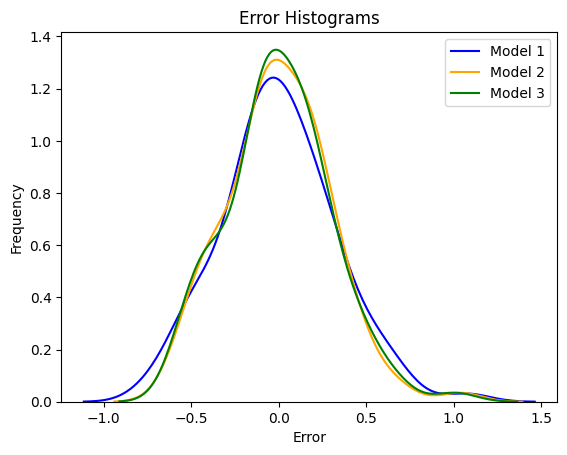

In [13]:
# Try a third model where the PTlevel is 1 if is has a non-zero value and 0 otherwise
data['PTlevel_3'] = (data['PTlevel'] > 0).astype(int)
model3 = LinearRegression()
model3.fit(data[['Income', 'PTlevel_3', 'Carown']], data['TourFreq'])
data['TourFreq_pred_3'] = model3.predict(data[['Income', 'PTlevel_3', 'Carown']])
data['error_3'] = data['TourFreq'] - data['TourFreq_pred_3']

# Plot estimaed distributions
sns.kdeplot(data['error_1'], label='Model 1', color='blue')
sns.kdeplot(data['error_2'], label='Model 2', color='orange')
sns.kdeplot(data['error_3'], label='Model 3', color='green')


plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Histograms')
plt.legend()
plt.show()

The models seems very similar, so I will use the first one as that is the simplest one.

In [16]:
# We want to do a preduction for what happens if the income increases by 10% in each row (zone).
# We will look at the coefficients in the three models

# Model 1
print('Model 1')
print('Income coefficient:', model1.coef_[0], "<---- [[INCOME]]")
print('TourFreq coefficient:', model1.intercept_)

# Model 2
print('Model 2')
print('Income coefficient:', model2.coef_[0], "<---- [[INCOME]]")
print('PTlevel_1 coefficient:', model2.coef_[1])
print('PTlevel_2 coefficient:', model2.coef_[2])
print('Carown coefficient:', model2.coef_[3])
print('TourFreq coefficient:', model2.intercept_)

# Model 3
print('Model 3')
print('Income coefficient:', model3.coef_[0], "<---- [[INCOME]]")
print('PTlevel_3 coefficient:', model3.coef_[1])
print('Carown coefficient:', model3.coef_[2])
print('TourFreq coefficient:', model3.intercept_)


Model 1
Income coefficient: 0.07288230782733386 <---- [[INCOME]]
TourFreq coefficient: 1.1197529449737953
Model 2
Income coefficient: 0.06279671561246185 <---- [[INCOME]]
PTlevel_1 coefficient: 0.23585260590818558
PTlevel_2 coefficient: 0.16066442181026677
Carown coefficient: 0.37244667829935857
TourFreq coefficient: 0.5592852594112776
Model 3
Income coefficient: 0.06168754733547611 <---- [[INCOME]]
PTlevel_3 coefficient: 0.19260236400555258
Carown coefficient: 0.37448189292323775
TourFreq coefficient: 0.5613844788823583


In [20]:
# We will make a model_1_increased where the coefficient of income is increased by 10%
# That is equivalent to multiplying the coefficient by 1.1 before doing the prediction
model1_increased = LinearRegression()
model1_increased.coef_ = model1.coef_ * 1.1
model1_increased.intercept_ = model1.intercept_
data['TourFreq_pred_1_increased'] = model1_increased.predict(data[['Income']])

# Calculate the average TourFreq in this prediction
print('Average TourFreq in model 1:', data['TourFreq_pred_1'].mean())

# Calculate the average TourFreq in the prediction with increased income
print('Average TourFreq in model 1 increased:', data['TourFreq_pred_1_increased'].mean())

Average TourFreq in model 1: 1.4239865439521069
Average TourFreq in model 1 increased: 1.454409903849938


/home/mbg/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [28]:
# I will calculate the elasiticity of the income in model 3 (as that is the one that they have in the solution)
data['model_3_income_elasitic'] = model3.coef_[0] * data['Income'] / data['TourFreq_pred_3'] 

# Calculate min, mean and max elasticity
print("Income elasticity")
print('Min elasticity:', data['model_3_income_elasitic'].min())
print('Mean elasticity:', data['model_3_income_elasitic'].mean())
print('Max elasticity:', data['model_3_income_elasitic'].max())

# And the same for the Carown variable
data['model_3_carown_elasitic'] = model3.coef_[2] * data['Carown'] / data['TourFreq_pred_3']
print("Carown elasticity")
print('Min elasticity:', data['model_3_carown_elasitic'].min())
print('Mean elasticity:', data['model_3_carown_elasitic'].mean())
print('Max elasticity:', data['model_3_carown_elasitic'].max())

Income elasticity
Min elasticity: 0.04495663626547617
Mean elasticity: 0.1699780005560555
Max elasticity: 0.4211728024189327
Carown elasticity
Min elasticity: 0.19515757101556175
Mean elasticity: 0.3275697218965974
Max elasticity: 0.4374552899476636
